In [1]:
import numpy as np
import pandas as pd
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data=pd.read_csv("C:/Users/student/Downloads/Python_JP/word2vec/Reviews.csv", nrows=100000)
print(len(data))

100000


In [3]:
#data.head(5)
#data.info()
data=data[['Text','Summary']]
data.head()

,Text,Summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy


In [4]:
#data['Text']   #text열에 대해 중복 제외한 데이터 개수 출력
data['Text'].nunique()

88426

In [5]:
data.drop_duplicates(subset=['Text'], 
                     inplace=True)

In [6]:
len(data)

88426

In [7]:
data.isnull().sum()

Text       0
Summary    1
dtype: int64

In [8]:
data.dropna(axis=0, inplace=True)

In [9]:
#전처리
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [10]:
stopWords=set(stopwords.words('english'))
len(stopWords) #179

179

In [11]:
def preprocessSentence(sent, rs=True):
    sent=sent.lower()
    sent=BeautifulSoup(sent, "lxml").text#html태그제거
    sent=re.sub("\([^)]*\)", "" , sent)
    sent=re.sub('"', "" , sent)
    sent=" ".join([contractions[t] if t in 
                   contractions else t for t in 
                   sent.split(" ")])
    sent=re.sub("'s\b", "",sent) #소유격제거
    sent=re.sub("[^a-zA-Z]", " ",sent)
    sent=re.sub("[m]{2,}", "mm", sent)
    
    #rs==True => 불용어 제거(원문)
    if rs:
        tokens=" ".join(word for word in sent.split() 
        if not word in stopWords 
        if len(word)>1)
    else: #불용어 제거 안함(요약)
        tokens=" ".join(word for word in 
                        sent.split() if len(word)>1)    
    return tokens    

In [12]:
print(preprocessSentence("<a>I ammmmmmmmmm a student</a>"))

amm student


In [13]:
cleanText=[]
for sent in data['Text']:
    cleanText.append(preprocessSentence(sent))
print(cleanText[:10])

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better', 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo', 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch', 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal', 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal', 'got wild hair taffy ordered five pound bag taffy enjoyable many flavors watermelon root beer melon peppermint grape etc complaint bit much red black licorice flavored pieces kids husband lasted

In [14]:
data['Text']=cleanText

In [15]:
cleanSummary=[]
for sent in data['Summary']:
    cleanSummary.append(preprocessSentence(sent))
print(cleanSummary[:10])

C:\Users\student\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\student\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


['good quality dog food', 'advertised', 'delight says', 'cough medicine', 'great taffy', 'nice taffy', 'great good expensive brands', 'wonderful tasty taffy', 'yay barley', 'healthy dog food']


In [16]:
data['Summary']=cleanSummary

In [17]:
data[:10]

,Text,Summary
0,bought several vitality canned dog food produc...,good quality dog food
1,product arrived labeled jumbo salted peanuts p...,advertised
2,confection around centuries light pillowy citr...,delight says
3,looking secret ingredient robitussin believe f...,cough medicine
4,great taffy great price wide assortment yummy ...,great taffy
5,got wild hair taffy ordered five pound bag taf...,nice taffy
6,saltwater taffy great flavors soft chewy candy...,great good expensive brands
7,taffy good soft chewy flavors amazing would de...,wonderful tasty taffy
8,right mostly sprouting cats eat grass love rot...,yay barley
9,healthy dog food good digestion also good smal...,healthy dog food


In [18]:
data.replace("", np.nan,inplace=True)

In [19]:
data.isnull().sum()
data.dropna(axis=0, inplace=True)

In [20]:
len(data)

88134

In [21]:
textLen=[len(s.split()) for s in data['Text']]
summaryLen=[len(s.split()) for s in data['Summary']]

In [22]:
np.min(textLen)#2
np.max(textLen)#1235
np.mean(textLen)#38
np.min(summaryLen)#1
np.max(summaryLen)#16
np.mean(summaryLen)#2.8

2.872115188236095

In [23]:
textMaxLen=50
summaryMaxLen=8

In [24]:
def threshLen(mlen, nlist):
    c=0
    for s in nlist:
        if(len(s.split()) <= mlen):
            c+=1
    print(c/len(nlist))

In [25]:
threshLen(textMaxLen, data['Text'])
threshLen(summaryMaxLen, data['Summary'])

0.7746726575441941
0.9943948986770146


In [26]:
data=data[data['Text'].apply(
    lambda x:len(x.split())<=textMaxLen)]
data=data[data['Summary'].apply(
    lambda x:len(x.split())<=summaryMaxLen)]

In [27]:
print(len(data)) #68천

68061


In [28]:
#seq2seq
data['Summary']=data['Summary'].apply(lambda x:"sostoken "+  x  +" eostoken")
data['Summary']

0        sostoken good quality dog food eostoken
1                   sostoken advertised eostoken
2                 sostoken delight says eostoken
3               sostoken cough medicine eostoken
4                  sostoken great taffy eostoken
                          ...                   
99993              sostoken great stuff eostoken
99994               sostoken good stuff eostoken
99995                    sostoken yummy eostoken
99997              sostoken great ramen eostoken
99998                    sostoken spicy eostoken
Name: Summary, Length: 68061, dtype: object

In [29]:
textData=list(data['Text'])
summaryData=list(data['Summary'])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xTrain, xTest, yTrain, yTest=train_test_split(textData, summaryData, test_size=0.2, random_state=42, shuffle=True)

In [32]:
len(xTrain)#54448
len(xTest)#13613

13613

In [33]:
srcToken=Tokenizer()
srcToken.fit_on_texts(xTrain)
#단어 집합 생성

In [34]:
totalCnt=len(srcToken.word_index) #32000 여개

In [35]:
totalFreq=0 #전체 단어 빈도수 총 합
rCnt=0 #빈도수가 10 미만인 단어의 개수
rFreq=0 #빈도수가 10 미만인 단어 빈도수 총 합
for k, v in srcToken.word_counts.items():
    totalFreq+=v
    if(v<10):
        rCnt+=1
        rFreq+=v
print("단어 빈도수 총합", totalFreq)#1323945
print("단어수", totalCnt)#32688
print(rCnt/totalCnt) #78%
print(rFreq/totalFreq)#4%
print(totalCnt-rCnt)  #6956 -> 7000


단어 빈도수 총합 1323945
단어수 32668
0.7870699155136525
0.04192696826529803
6956


In [36]:
srcVocab=7000
srcToken=Tokenizer(num_words=srcVocab)
srcToken.fit_on_texts(xTrain)

In [37]:
xTrain=srcToken.texts_to_sequences(xTrain)
xTest=srcToken.texts_to_sequences(xTest)

In [38]:
print(xTrain[0])
data['Text'][0]

[105, 170, 14, 491, 523, 7, 71, 1106, 45, 249, 1705, 170, 51, 33, 534, 1479, 718, 143, 168, 160, 135]


'bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better'

In [39]:
tarToken=Tokenizer()
tarToken.fit_on_texts(yTrain)

In [40]:
totalFreq=0 #전체 단어 빈도수 총 합
rCnt=0 #빈도수가 10 미만인 단어의 개수
rFreq=0 #빈도수가 10 미만인 단어 빈도수 총 합

for k, v in tarToken.word_counts.items():
    totalFreq+=v
    if(v<10):
        rCnt+=1
        rFreq+=v
        
        
print("단어 빈도수 총합", totalFreq)#1323945
print("단어수", totalCnt)#32688
print(rCnt/totalCnt) #78%
print(rFreq/totalFreq)#4%
print(totalCnt-rCnt)  #6956 -> 7000

단어 빈도수 총합 254334
단어수 32668
0.28223337822946004
0.07756336156392775
23448


In [41]:
tarVoc=2000
tarTokenizer=Tokenizer(num_words=tarVoc)
tarTokenizer.fit_on_texts(yTrain)

In [42]:
yTrain=tarTokenizer.texts_to_sequences(yTrain)
yTest=tarTokenizer.texts_to_sequences(yTest)

In [43]:
yTrain[:5]

[[1, 44, 5, 2],
 [1, 16, 2],
 [1, 10, 735, 8, 2],
 [1, 33, 801, 85, 1300, 2],
 [1, 187, 234, 183, 54, 31, 2]]

In [44]:
dropTrain=[i for i, sent in 
           enumerate(yTrain) 
           if len(sent)==2]
dropTest=[i for i, sent in 
          enumerate(yTest) 
          if len(sent)==2]

In [45]:
xTrain=np.delete(xTrain, dropTrain, axis=0)
yTrain=np.delete(yTrain, dropTrain, axis=0)
xTest=np.delete(xTest, dropTest, axis=0)
yTest=np.delete(yTest, dropTest, axis=0)

In [46]:
len(xTrain) #52722
len(xTest) #13181

13181

In [47]:
xTrain=pad_sequences(xTrain,maxlen=textMaxLen, padding='post')
xTest=pad_sequences(xTest,maxlen=textMaxLen, padding='post')
yTrain=pad_sequences(yTrain,maxlen=summaryMaxLen, padding='post')
yTest=pad_sequences(yTest,maxlen=summaryMaxLen, padding='post')

In [48]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(textMaxLen,))

# 인코더의 임베딩 층
enc_emb = Embedding(srcVocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb = Embedding(tarVoc, embedding_dim)(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

# 디코더의 출력층
decoder_softmax_layer = Dense(tarVoc, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      896000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
_____________________________________________________________________________________________

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      896000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

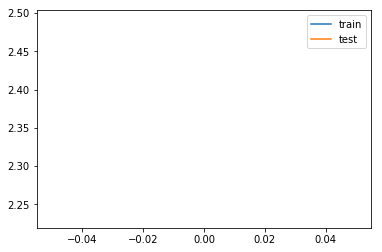

NameError: name 'dec_emb_layer' is not defined

In [49]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tarVoc, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit([xTrain, yTrain[:,:-1]], yTrain.reshape(yTrain.shape[0], yTrain.shape[1], 1)[:,1:] \
                  ,epochs=1, callbacks=[es], batch_size = 256, validation_data=([xTest, yTest[:,:-1]], \
                  yTest.reshape(yTest.shape[0], yTest.shape[1], 1)[:,1:]))
#epochs = 50으로 교체
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()



src_index_to_word = srcToken.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tarToken.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tarToken.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2= dec_emb_layer(decoder_inputs) 
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(textMaxLen, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

def decode_sequence(input_seq):#(1,50)
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)
    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1, tarVoce))
    target_seq[0, 0, tar_to_index['\t']] = 1.

    stop_condition = False
    decoded_sentence = ""
    while not stop_condition: #stop_condition이 True가 될 때까지 루프 반복
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]
        decoded_sentence += sampled_char

        # <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '\n' or
           len(decoded_sentence) > maxTarLen):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트 합니다.
        target_seq = np.zeros((1, 1, tar_vocab_size))
        target_seq[0, 0, sampled_token_index] = 1.

        # 상태를 업데이트 합니다.
        states_value = [h, c]

    return decoded_sentence

# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostoken']) and i!=target_word_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

for i in range(500, 1000):
    print("원문 : ",seq2text(xTest[i]))
    print("실제 요약문 :",seq2summary(yTest[i]))
    print("예측 요약문 :",decode_sequence(xTest[i].reshape(1, textMaxLen)))
    print("\n")

In [ ]:
from keras.models import load_model
model2 = load_model("C:/Users/student/Downloads/Python_JP/review_seq2seq_Multi_LSTM")